In [6]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,optimizers,datasets
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tfds


In [86]:
builder = tfds.builder('binarized_mnist')
ds = builder.as_dataset(split='test+train[:75%]')

In [88]:
train_ds, test_ds = tfds.load('binarized_mnist', split=['train', 'test[:50%]'])

In [91]:
train_ds

<PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None)}>

In [58]:
data, metadata = tfds.load('binarized_mnist', with_info=True)

In [60]:
train, test = data['train'], data['test']

(train, test), metadata = tfds.load('binarized_mnist', split=['train', 'test'], with_info=True)

(data, metadata) = tfds.load('binarized_mnist',split=['train[:90%]', 'train[90%:]', 'test'],with_info=True)

train_data = data[0]
valid_data = data[1]
test_data = data[2]

In [61]:
print(train_data)

<PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None)}>


In [62]:
print(test_data)

<PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None)}>


In [63]:
print(valid_data)

<PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None)}>


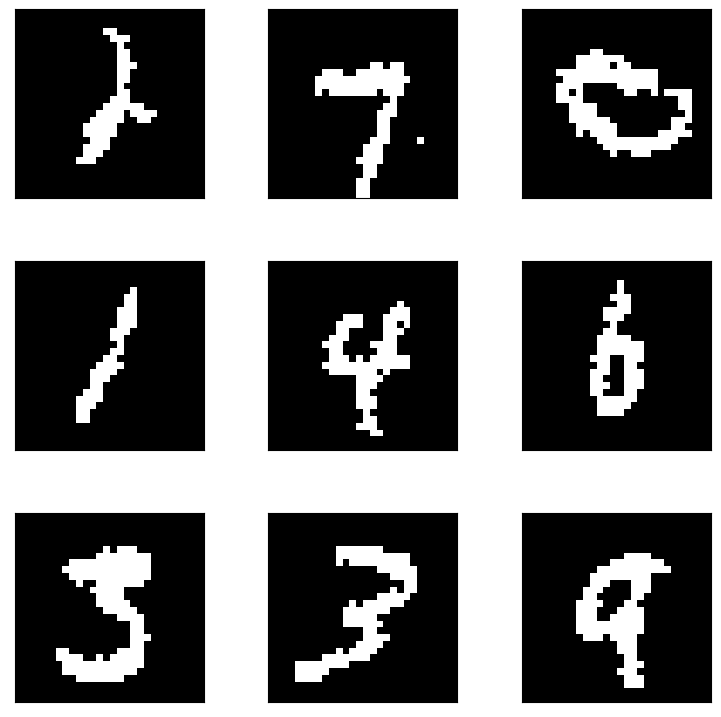

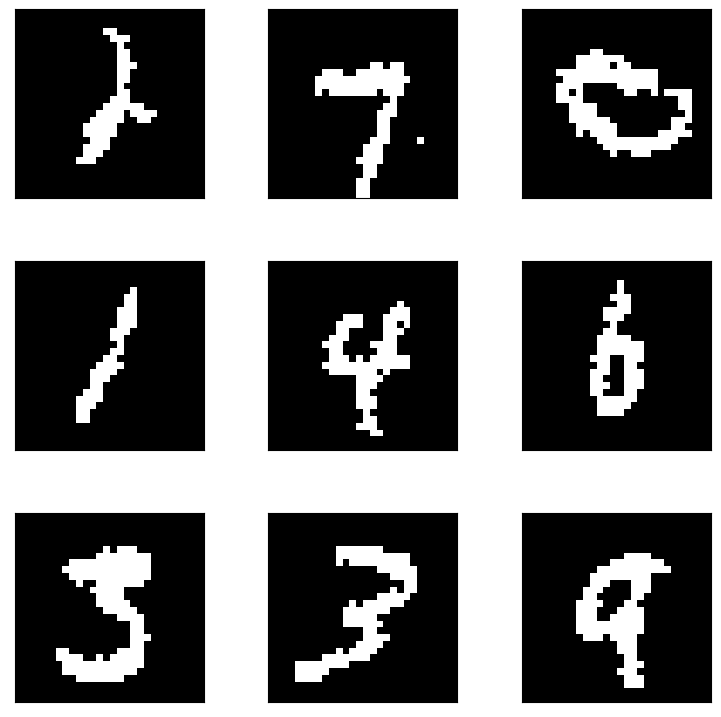

In [51]:
tfds.show_examples(ds2, info)

In [70]:
model_data = keras.Sequential()

In [71]:
model_data.add(layers.Dense(512,activation='relu',input_dim=784))
model_data.add(layers.Dense(256,activation='relu'))
model_data.add(layers.Dense(128,activation='relu'))
model_data.add(layers.Dense(10,activation='softmax'))

In [72]:
model_data.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [73]:
Optimizer = optimizers.Adam(learning_rate=0.0001)
model_data.compile(loss=keras.losses.categorical_crossentropy,optimizer=Optimizer, metrics=['accuracy'])